Instalando o pytorch

In [ ]:
!pip install torch

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
print(torch.__version__)

1.9.0+cu102


##Montando a Rede Neural

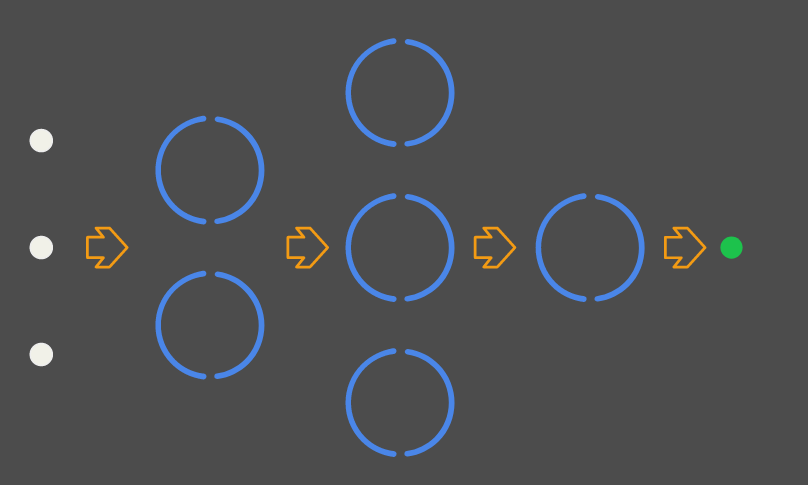

In [3]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.sig = nn.LogSigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self,x):
        x = self.fc1(x)
        x = self.sig(x)
        x = self.fc2(x)
        x = self.sig(x)
        x = self.fc3(x)
        x = self.sig(x)

        out = self.softmax(x)
        return out



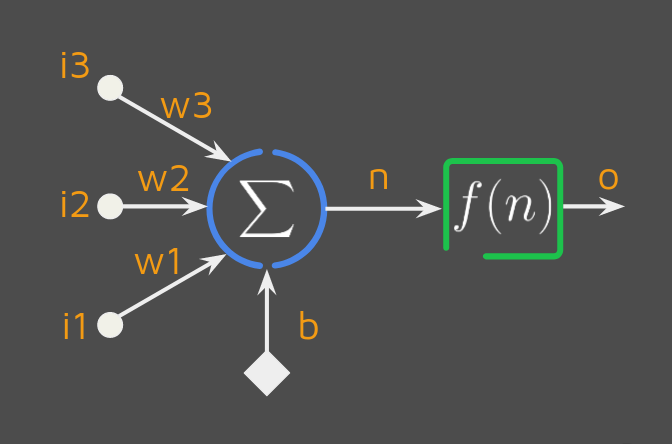

# Criando um modelo básico
* 4 coisas entram
* 3 coisas saem

Imagine que estamos escolhendo uma dentre 3 ações. Então teremos na saída a probabilidade de tomarmos cada uma das ações.

In [4]:
model = MyModel(4,3)

Teste básico:

In [5]:
model(torch.Tensor([[1,1,0.5,1]]))

tensor([[0.4701, 0.2402, 0.2897]], grad_fn=<SoftmaxBackward>)

Com a Softmax, a soma dos valores de saída é 1

---

Vamos criar um dataset "expert"

In [6]:
def expert(input):
    v = np.asarray(input).mean()
    if v>2/3:
      a = 0
    elif v<2/3 and v>1/3:
      a = 1
    elif v<1/3:
      a = 2
    return a

In [7]:
def collect_dataset(n):
    a = []
    inputs = []
    for i in range(n):
      input = np.random.rand(4)
      inputs.append(input)
      a.append(expert(input))
    a = nn.functional.one_hot(torch.Tensor(a).to(torch.int64),3)
    return torch.Tensor(np.asarray(inputs)), a

Formato da entrada: `[[n,n,n,n], [n,n,n,n], . . .]`

Formato da saída: `[[0,0,1], [1,0,0], [0,1,0], . . .]`

---

A função de perda:

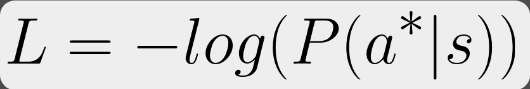

In [8]:
def lossfunc(model_out, true_out):
    a_prob = model_out*true_out
    return -torch.log(a_prob.sum(1)).mean()

Acurácia, para medir o quão bom está o nosso modelo. O quanto ele consegue acrtar as respostas

In [9]:
def acc(model_out, true_out):
    model_a = model_out.argmax(1)
    true_a = true_out.argmax(1)
    return torch.sum(model_a == true_a)

In [10]:
learning_rate=0.0045
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
model = model.train()
for epoch in range(50):
    
    x, y = collect_dataset(100000)
    m = model(x)
    loss = lossfunc(m, y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    train_acc = acc(m, y)/100000

    train_loss = loss.detach().item()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' \
          %(epoch, train_loss, train_acc))    

Epoch: 0 | Loss: 1.3064 | Train Accuracy: 0.1305
Epoch: 1 | Loss: 1.0085 | Train Accuracy: 0.1533
Epoch: 2 | Loss: 0.8836 | Train Accuracy: 0.7429
Epoch: 3 | Loss: 0.8181 | Train Accuracy: 0.7413
Epoch: 4 | Loss: 0.7784 | Train Accuracy: 0.7388
Epoch: 5 | Loss: 0.7545 | Train Accuracy: 0.7410
Epoch: 6 | Loss: 0.7597 | Train Accuracy: 0.7430
Epoch: 7 | Loss: 0.7817 | Train Accuracy: 0.7410
Epoch: 8 | Loss: 0.7871 | Train Accuracy: 0.7419
Epoch: 9 | Loss: 0.7850 | Train Accuracy: 0.7398
Epoch: 10 | Loss: 0.7614 | Train Accuracy: 0.7429
Epoch: 11 | Loss: 0.7465 | Train Accuracy: 0.7408
Epoch: 12 | Loss: 0.7360 | Train Accuracy: 0.7396
Epoch: 13 | Loss: 0.7347 | Train Accuracy: 0.7380
Epoch: 14 | Loss: 0.7346 | Train Accuracy: 0.7395
Epoch: 15 | Loss: 0.7362 | Train Accuracy: 0.7403
Epoch: 16 | Loss: 0.7363 | Train Accuracy: 0.7410
Epoch: 17 | Loss: 0.7337 | Train Accuracy: 0.7401
Epoch: 18 | Loss: 0.7278 | Train Accuracy: 0.7403
Epoch: 19 | Loss: 0.7215 | Train Accuracy: 0.7393
Epoch: 20 